# question 1
	Q. 1 Write python code for  to Perform contrast stretching using Piecewise Linear transformation  functions on the input image shown  below according to the transfer function shown in the Figure. 
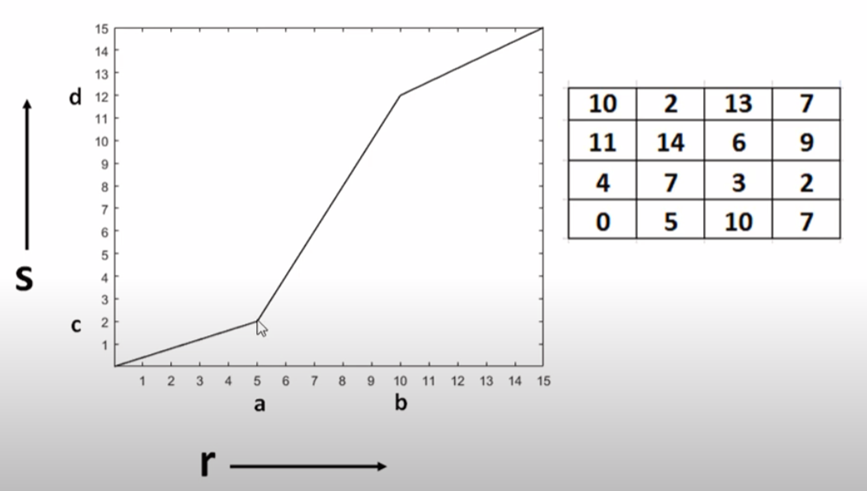

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [2]:
#Linear transformation

Input_img=np.array([[10,2,13,7],[11,14,6,9],[4,7,3,2],[0,5,10,7]])

def contrast_stretching(Input_img):
    L,W=Input_img.shape
    maxkeeper=[]
    minkeeper=[]
    for i in range(0,W):
        maxkeeper.append(max(Input_img[i]))
        minkeeper.append(min(Input_img[i]))
    fmax=max(maxkeeper)
    fmin=min(minkeeper)
    levels=fmax+1
    output=np.zeros((L,W))
    for i in range(0,L):
        for j in range(0,W):
            output[i][j]= np.round(((Input_img[i][j] - fmin)/(fmax-fmin))*levels)
    return output

print(contrast_stretching(Input_img))


[[11.  2. 14.  8.]
 [12. 15.  6. 10.]
 [ 4.  8.  3.  2.]
 [ 0.  5. 11.  8.]]


In [3]:
# x0,y0=0,0
# x1,y1=5,2
# x2,y2=10,12
# x3,y3=15,15
Input_img=np.array([[10,2,13,7],[11,14,6,9],[4,7,3,2],[0,5,10,7]])
x0,y0,x1,y1,x2,y2,x3,y3=0,0,5,2,10,12,15,15

def peacewiselineartransform(Input_img,x0,y0,x1,y1,x2,y2,x3,y3):
    x=(y1-y0)/(x1-x0)
    y=(y2-y1)/(x2-x1)
    z=(y3-y2)/(x3-x2)

    table=[]
    for i in range(0,x1+1):
        op1=np.round(x*i)
        table.append(op1)
     
    for i in range(x1+1,x2+1):
        op2=np.round((y*(i-x1))+ op1) 
        table.append(op2)

    for i in range(x2+1,x3+1):
        op3=np.round((z*(i-x2)) + op2)
        table.append(op3)
  
    l,w=Input_img.shape
    new_shape=l*w
    IP_1D=np.reshape(Input_img,(new_shape))
    OP_1D=[]

    for i in range(0,new_shape):
        temp=IP_1D[i]
        OP_1D.append(table[temp])
    OP=np.reshape(OP_1D,(l,w))
    return OP

print(peacewiselineartransform(Input_img,x0,y0,x1,y1,x2,y2,x3,y3))


[[12.  1. 14.  6.]
 [13. 14.  4. 10.]
 [ 2.  6.  1.  1.]
 [ 0.  2. 12.  6.]]


# question 3


In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import random_noise

In [37]:
path='cameraman.tif'
noise_img = random_noise(img, mode="s&p",amount=0.2)
img_noisy1 = np.array(255*noise_img, dtype = 'uint8')
m, n = img_noisy1.shape 
img_new1 = np.zeros([m, n]) 

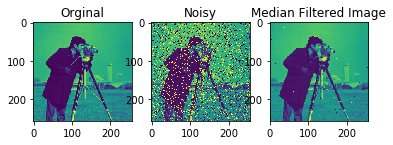

In [45]:
img = cv2.imread(path,0)
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1, j-1],img_noisy1[i-1, j],img_noisy1[i-1, j + 1],img_noisy1[i, j-1],img_noisy1[i, j],img_noisy1[i, j + 1],img_noisy1[i +1, j-1],img_noisy1[i + 1, j],img_noisy1[i + 1, j + 1]]
        temp = sorted(temp)
        img_new1[i, j]= temp[4]

img_new1 = img_new1.astype(np.uint8) 
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Orginal')
plt.subplot(1,3,2)
plt.imshow(img_noisy1)
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(img_new1)
plt.title('Median Filtered Image')
plt.show()

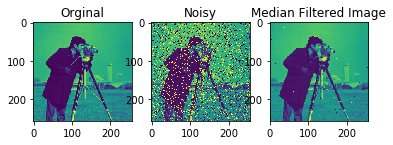

In [44]:
img = cv2.imread(path,0)
for i in range(1, m-1):
    for j in range(1, n-1):
        if(img_noisy1[i][j]>300):
            temp = [img_noisy1[i-1, j-1],img_noisy1[i-1, j],img_noisy1[i-1, j + 1],img_noisy1[i, j-1],img_noisy1[i, j],img_noisy1[i, j + 1],img_noisy1[i +1, j-1],img_noisy1[i + 1, j],img_noisy1[i + 1, j + 1]]
            temp = sorted(temp)
            img_new1[i, j]= temp[4]
        

img_new1 = img_new1.astype(np.uint8) 
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Orginal')
plt.subplot(1,3,2)
plt.imshow(img_noisy1)
plt.title('Noisy')
plt.subplot(1,3,3)
plt.imshow(img_new1)
plt.title('Median Filtered Image')
plt.show()
